

# **Intel Image Classification Using ResNet9**







This is my project on Intel Image Classification Using ResNet9 using pytorch .The dataset is taken from kaggle here is the [link](https://www.kaggle.com/puneet6060/intel-image-classification).This Dataset contains around 25k images of size 150x150 distributed under 6 categories:`buildings`,`forest`,`glacier`,`mountain`,`sea`,`street`.It is a natural scenes image dataset.The dataset is divided into two folders training set and testing set


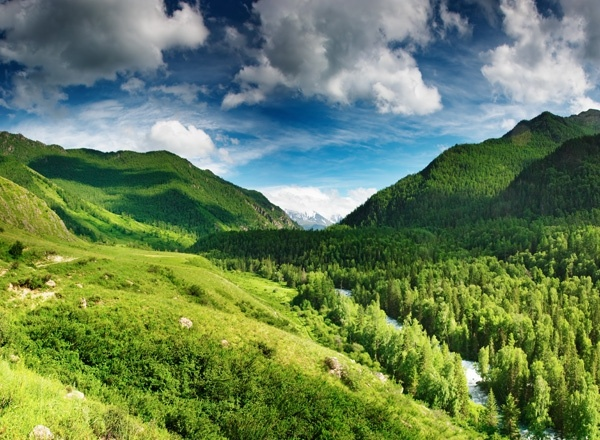

# Objective


The goal is to classify the images and train a model to predict any unseen images with a good accuracy using `deep neural network`, `Convolutional neural network(CNN)` and `ResNet9`.

We will also use some techniques to improve our model's performance such as
1. Augmentation
2. Learning Rate Scheduling
3. gradient Clipping
4. Weight decay
5. DropOut


Lets gets started by importing some necessary liabraries

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torchvision.transforms as tt
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline


# Lets begin by downloading the Dataset

Importing jovian python liabrary so that we will be able to commit the data of this notebook to jovian website

In [ ]:
project="Intel_Image_Classification_Using_ResNet9"

In [ ]:

!pip install jovian --upgrade --quiet

opendatasets liabrary is used here to download dataset from kaggle

In [ ]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

In [ ]:
dataset_url='https://www.kaggle.com/puneet6060/intel-image-classification'
od.download(dataset_url) 

Skipping, found downloaded files in "./intel-image-classification" (use force=True to force download)


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/neha-prajapati/intel-image-classification-using-resnet9


'https://jovian.ai/neha-prajapati/intel-image-classification-using-resnet9'

# Exploring Intel Image Dataset

Looking into the Data Folder

In [ ]:
data_dir='./intel-image-classification'

In [ ]:
import os
os.listdir(data_dir)

['seg_pred', 'seg_train', 'seg_test']

In [ ]:
classes=os.listdir(data_dir+'/seg_train/seg_train')
classes

['glacier', 'forest', 'buildings', 'mountain', 'sea', 'street']

We have 6 classes denotting different natural scenes

Total images in Training Folder

In [ ]:
#counting no. of images in each class
images_perclass=[]
for x in classes:
  num=len(os.listdir(data_dir+'/seg_train/seg_train/'+x))
  images_perclass.append(num)
  print("NO. of Images in {} class: {}".format(x,num))
print("\n")
print("NO of Images in Training Folder ->",sum(images_perclass))

NO. of Images in glacier class: 2404
NO. of Images in forest class: 2271
NO. of Images in buildings class: 2191
NO. of Images in mountain class: 2512
NO. of Images in sea class: 2274
NO. of Images in street class: 2382


NO of Images in Training Folder -> 14034


Total images in Testing Folder

In [ ]:
images_perclass=[]
for x in classes:
  num=len(os.listdir(data_dir+'/seg_test/seg_test/'+x))
  images_perclass.append(num)
  print("NO. of Images in {} class: {}".format(x,num))
print("\n")
print("NO of Images in Testing Folder ->",sum(images_perclass))

NO. of Images in glacier class: 553
NO. of Images in forest class: 474
NO. of Images in buildings class: 437
NO. of Images in mountain class: 525
NO. of Images in sea class: 510
NO. of Images in street class: 501


NO of Images in Testing Folder -> 3000


Now we will create temporary dataset to know the insights of the images
As we know that are dataset contain images so to do Training operations on images we need to convert them into Tensors using 
torchvision.transforms.ToTensor

In [ ]:
train_set=ImageFolder(data_dir+'/seg_train/seg_train/',transform=tt.ToTensor())

In [ ]:
train_set

Dataset ImageFolder
    Number of datapoints: 14034
    Root location: ./intel-image-classification/seg_train/seg_train/
    StandardTransform
Transform: ToTensor()

We will create a funtion to show some examples of different images from the dataset

In [ ]:
def show_images(image,label):
  print('LABEL: {},{} '.format(train_set.classes[label],label))
  print("shape of the image",image.shape)
  plt.imshow(image.permute(1,2,0))

LABEL: buildings,0 
shape of the image torch.Size([3, 150, 150])


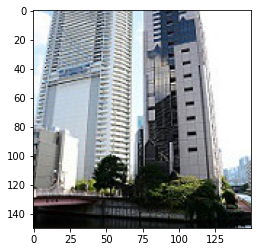

In [ ]:
show_images(*train_set[500])

LABEL: glacier,2 
shape of the image torch.Size([3, 150, 150])


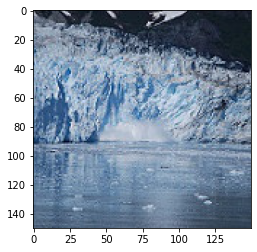

In [ ]:
show_images(*train_set[5000])

LABEL: mountain,3 
shape of the image torch.Size([3, 134, 150])


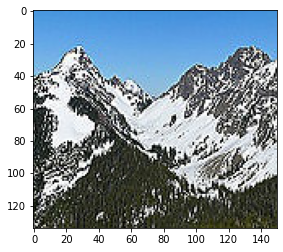

In [ ]:
show_images(*train_set[7120])

#Non standard Images

In [ ]:
# Images which are not in shape [3 x 150 x 150]
for image,_ in train_set:
  if image.shape == torch.Size([3,150,150]):
    continue
  else:
    print(image.shape)

torch.Size([3, 124, 150])
torch.Size([3, 113, 150])
torch.Size([3, 108, 150])
torch.Size([3, 133, 150])
torch.Size([3, 115, 150])
torch.Size([3, 135, 150])
torch.Size([3, 136, 150])
torch.Size([3, 108, 150])
torch.Size([3, 113, 150])
torch.Size([3, 110, 150])
torch.Size([3, 105, 150])
torch.Size([3, 111, 150])
torch.Size([3, 120, 150])
torch.Size([3, 149, 150])
torch.Size([3, 143, 150])
torch.Size([3, 146, 150])
torch.Size([3, 134, 150])
torch.Size([3, 142, 150])
torch.Size([3, 123, 150])
torch.Size([3, 119, 150])
torch.Size([3, 102, 150])
torch.Size([3, 76, 150])
torch.Size([3, 97, 150])
torch.Size([3, 111, 150])
torch.Size([3, 111, 150])
torch.Size([3, 135, 150])
torch.Size([3, 134, 150])
torch.Size([3, 135, 150])
torch.Size([3, 123, 150])
torch.Size([3, 113, 150])
torch.Size([3, 142, 150])
torch.Size([3, 144, 150])
torch.Size([3, 103, 150])
torch.Size([3, 136, 150])
torch.Size([3, 144, 150])
torch.Size([3, 100, 150])
torch.Size([3, 143, 150])
torch.Size([3, 141, 150])
torch.Size([3,

# Data Preparation

We can create training and validation datasets using the `ImageFolder` class from `torchvision`. In addition to the `ToTensor` transform, we'll also apply some other transforms to the images. There are a few important changes we'll make while creating PyTorch datasets for training and validation:

1. **Use test set for validation**: Instead of setting aside a fraction (e.g. 10%) of the data from the training set for validation, we'll simply use the test set as our validation set. This just gives a little more data to train with.

2. **Randomized data augmentations**: We will apply randomly chosen transformations while loading images from the training dataset. Specifically, we will pad each image by 4 pixels, and then take a random crop of size 150 x 150 pixels, and then flip the image horizontally with a 50% probability. Since the transformation will be applied randomly and dynamically each time a particular image is loaded, the model sees slightly different images in each epoch of training, which allows it generalize better.

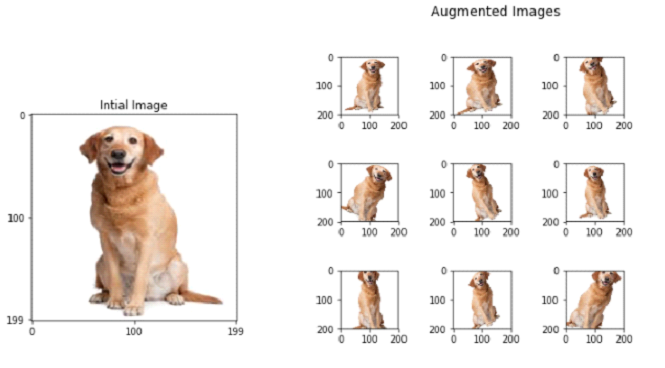

a)`Resizing data`:Some image are not in shape 150 x 150 shape so we need to Resize them


b)`RandomHorizontalFlip`: function will randomly flip the images horizontally

c)`RandomCrop`:Randomly crops the images with padding=4


In [ ]:
train_tt=tt.Compose([tt.Resize((150,150)),
                     tt.RandomHorizontalFlip(),
                     tt.RandomCrop(150,padding=4,padding_mode="reflect"),
                     tt.ToTensor()])

val_tt=tt.Compose([tt.Resize((150,150)),tt.ToTensor()])

Now lets create our dataset using ImageFolder and apply above transformations on them

In [ ]:
train_ds=ImageFolder(data_dir+'/seg_train/seg_train/',transform=train_tt)
validation_ds=ImageFolder(data_dir+'/seg_test/seg_test/',transform=val_tt)

Batch Size determines number no. of images we want to load in out DataLoader

In [ ]:
batch_size=25


*`shuffle=True`: Every time batches will have random images from the dataset


*`pin_memory`:pin_memory (bool, optional) – If True, the data loader will copy tensors into CUDA pinned memory before returning them.

In [ ]:
train_dl=DataLoader(train_ds,batch_size,shuffle=True,pin_memory=True)
val_dl=DataLoader(train_ds,batch_size,shuffle=True,pin_memory=True)

In [ ]:
# Funtion to show the images in one batch
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

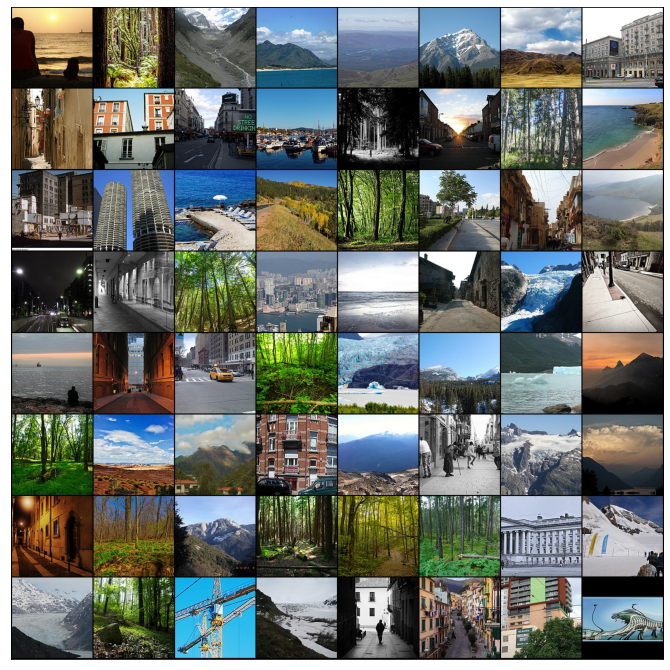

In [ ]:
show_batch(train_dl)

### Comparision between images after Data Augemntation

LABEL: buildings,0 
shape of the image torch.Size([3, 150, 150])


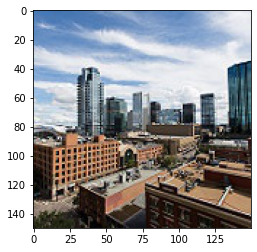

In [ ]:
# before any transformation
show_images(*train_set[1])

LABEL: buildings,0 
shape of the image torch.Size([3, 150, 150])


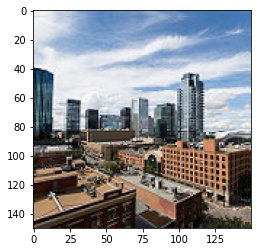

In [ ]:
#after transformation
show_images(*train_ds[1])

## **Using a GPU(Graphics processing units)**

To seamlessly use a GPU, if one is available, we define a couple of helper functions (get_default_device & to_device) and a helper class DeviceDataLoader to move our model & data to the GPU as required. 


In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
        
# Moves the model/data to device    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
          
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:

device = get_default_device()
device

device(type='cuda')

Function get_default returns either cuda(GPU) or CPU ,if it is GPU than it will help us in faster computaions

In [ ]:
train_dl=DeviceDataLoader(train_dl,device)
val_dl=DeviceDataLoader(val_dl,device)

We can now wrap our training and validation data loaders using DeviceDataLoader for automatically transferring batches of data to the GPU (if available)

# Model Creation using ResNet9 Architecture

Below cells contain basic functions for calulating accurracy ,training,validating,testing at the time of model creation

1.`accuracy`: this function will the return accuracy for preddicting the right class of the images

2.`training_step`:This function will return the loss using cross entropy loss functions on the basis of generated predictions and real labels

3.`validation_step`: Working same as training_step but in addition calculating accuraccy of the predictions also


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

# RestNet9 Layers

ResNet9 contains `8 Convolutional layers` and `1 Linear Layer` and follows below diagram for making the `Neural Network` of the model

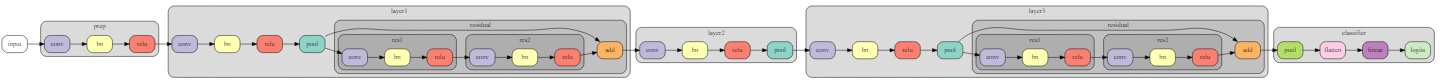

1.`conv2d`: conv2d class performs a convolution operation on the 2D matrix that is provided to it.A filter or a kernel in a conv2D layer has a height and a width. They are generally smaller than the input image and so we move them across the whole image.

2.`batchNorm2d`:Batch normalization is a technique to standardize the inputs to a network, applied to ether the activations of a prior layer or inputs directly. Batch normalization accelerates training and provides some regularization.To increase the stability of a neural network, batch normalization normalizes the output of a previous activation layer by subtracting the batch mean and dividing by the batch standard deviation.


3 `MaxPool`:Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.

4.`ReLU(Rectifies Linear Unit)`:ReLu is a non-linear activation function that is used in multi-layer neural networks or deep neural networks.The function returns 0 if it receives any negative input, but for any positive value x it returns that value back.It adds non-linearity to the data

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding = 1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace = True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)          #64 x 150 x 150
        self.conv2 = conv_block(64, 128, pool=True)       # 128 x 75 x 75
        self.res1 = nn.Sequential(conv_block(128, 128), 
                                  conv_block(128, 128))   # 128 x 75 x 75
        
        self.conv3 = conv_block(128, 256, pool=True)     #256 x 37 x 37
        self.conv4 = conv_block(256, 512, pool=True)     # 512 x 18 x 18
        self.res2 = nn.Sequential(conv_block(512, 512),
                                  conv_block(512, 512))  # 512 x 18 x 18
        
        self.classifier = nn.Sequential(nn.MaxPool2d(18), # 512 x 1 x 1
                                        nn.Flatten(),     #512
                                        nn.Dropout(0.2),  
                                        nn.Linear(512, num_classes))  # 512--> 10
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
# moving our model to the device we are using
model=to_device(ResNet9(3,6),device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

# Training the model

Before we train the model, we're going to make a bunch of small but important improvements to our `fit` function:

* **Learning rate scheduling**: Instead of using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one we'll use is called the **"One Cycle Learning Rate Policy"**, which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs. 

* **Weight decay**: We also use weight decay, which is yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function.

* **Gradient clipping**: Apart from the layer weights and outputs, it also helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values. This simple yet effective technique is called gradient clipping.


Let's define a `fit_one_cycle` function to incorporate these changes. We'll also record the learning rate used for each batch.

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)       # Calculate loss
            train_losses.append(loss)
            loss.backward()           # Calulate gradients
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()    # Update parameters based on gradients
            optimizer.zero_grad() # empty gradients
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader) # calculate accuracy and loss
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)  
        history.append(result)
    return history

In [ ]:
history=[evaluate(model,val_dl)]

In [ ]:
history

[{'val_acc': 0.1535310298204422, 'val_loss': 1.7943469285964966}]

We're now ready to train our model. Instead of SGD (stochastic gradient descent), we'll use the Adam optimizer which uses techniques like momentum and adaptive learning rates for faster training. 

In [ ]:
epochs=10
max_lr=0.01
grad_clip=0.1
weight_decay=1e-4
opt_func= torch.optim.Adam

In [ ]:
%%time

history+=fit_one_cycle(epochs,max_lr,model,train_dl,val_dl,
                       grad_clip=grad_clip,
                       weight_decay=weight_decay,
                       opt_func=opt_func)

Epoch [0], last_lr: 0.00279, train_loss: 0.9779, val_loss: 0.9127, val_acc: 0.6968
Epoch [1], last_lr: 0.00760, train_loss: 1.0162, val_loss: 1.2799, val_acc: 0.6160
Epoch [2], last_lr: 0.01000, train_loss: 0.7829, val_loss: 0.5988, val_acc: 0.7712
Epoch [3], last_lr: 0.00950, train_loss: 0.6352, val_loss: 0.6590, val_acc: 0.7627
Epoch [4], last_lr: 0.00812, train_loss: 0.5833, val_loss: 0.5408, val_acc: 0.7950
Epoch [5], last_lr: 0.00611, train_loss: 0.5450, val_loss: 0.5696, val_acc: 0.7900
Epoch [6], last_lr: 0.00389, train_loss: 0.4918, val_loss: 0.4348, val_acc: 0.8431
Epoch [7], last_lr: 0.00188, train_loss: 0.4083, val_loss: 0.3862, val_acc: 0.8533
Epoch [8], last_lr: 0.00050, train_loss: 0.3424, val_loss: 0.2508, val_acc: 0.9116
Epoch [9], last_lr: 0.00000, train_loss: 0.2764, val_loss: 0.2221, val_acc: 0.9239
CPU times: user 27min 19s, sys: 14min 56s, total: 42min 16s
Wall time: 42min 28s


In [ ]:
train_time='42:16'

# **92 % Accuracy**

Our model is trained with  **`92%`** accuracy in 42 min and that is a very good accuracy 

Let's plot the valdation set accuracies to study how the model improves over time.

In [ ]:
def plot_accuracies(history):
  fig=figure
  accuracies = [x['val_acc'] for x in history]
  plt.plot(accuracies,'-x')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Accuracy Vs No of Epochs')


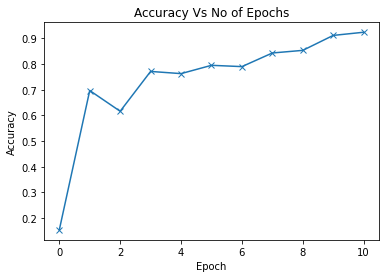

In [ ]:
plot_accuracies(history)

The graph increases rapidly at the starting and then
at the end the accuracy started increasing slowly.

In [ ]:
def plot_losses(history):
  train_losses = [x.get('train_loss') for x in history]
  val_losses = [x['val_loss'] for x in history]
  plt.plot(train_losses,'-bx')
  plt.plot(val_losses,'-rx')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Training','Validation'])
  plt.title("Loss Vs No. of Epochs")


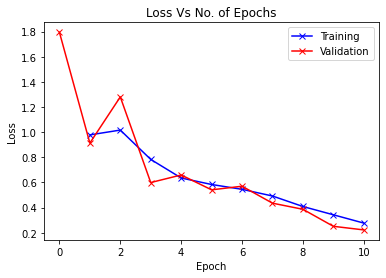

In [ ]:
plot_losses(history)

From the above graph it is very clear that `overfitting` is avoided to a very great extent

In [ ]:
def plot_lrs(history):
  lrs = np.concatenate([x.get('lrs',[]) for x in history])
  plt.plot(lrs)
  plt.xlabel('Batch no.')
  plt.ylabel('Learning Rate')
  plt.title('Learning Rate Vs Batch No.')


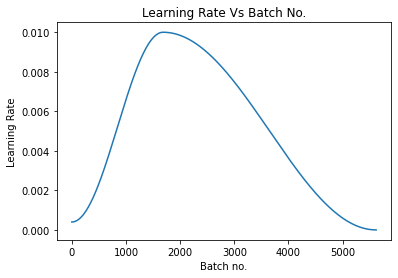

In [ ]:
plot_lrs(history)

As expected, the learning rate starts at a low value, and gradually increases for 30% of the iterations to a maximum value of 0.01, and then gradually decreases to a very small value.

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined testing dataset of 3000 images.


In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]


Label: buildings , Predicted: buildings


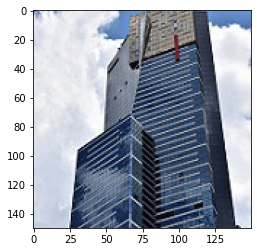

In [ ]:
img, label = validation_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: mountain , Predicted: mountain


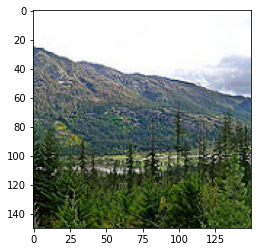

In [ ]:
img, label = validation_ds[1500]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: buildings , Predicted: street


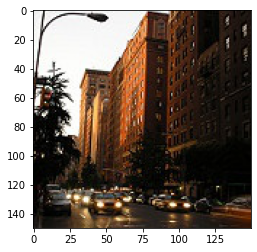

In [ ]:
img, label = validation_ds[254]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: sea , Predicted: sea


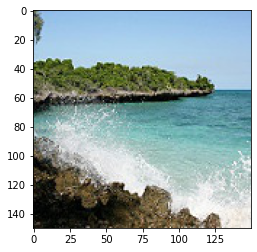

In [ ]:
img, label = validation_ds[2000]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: glacier , Predicted: glacier


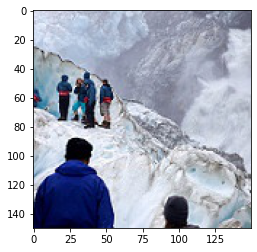

In [ ]:
img, label = validation_ds[1000]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: forest , Predicted: forest


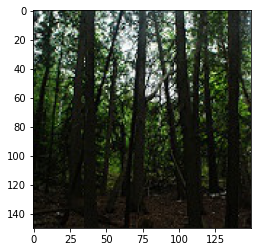

In [ ]:
img, label = validation_ds[725]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Our model is doing pretty good on test images.

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

# Conclusion

We created a ResNet9 model for intel image classification with convolutional neural network and we were able to achieve an accuracy above 90%.By applying data augmentation,batch normalization we made are model more generalized which trained the model more accurately

# Future Work

There is a lot of scope for future work and improvement like we can use different architecture,hperparametrs such as batc size,learning rate,different optimizers to increase the accuracy of the model

# References


*   https://jovian.ai/learn/deep-learning-with-pytorch-zero-to-gans
*   https://pytorch.org/

* https://towardsdatascience.com/



# Save and Commit
Let's save the weights of the model, record the hyperparameters, and commit our experiment to Jovian. 

In [ ]:
torch.save(model.state_dict(),'intel-image-classification-resnet9.pth')

In [ ]:
jovian.reset()
jovian.log_hyperparams(arch='resnet9', 
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [ ]:

jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   time=train_time)

[jovian] Metrics logged.


In [ ]:
jovian.commit(project = project_name, 
              environment = None, 
              ouputs = ['intel-image-classification-cp.pth'])